<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Визуальный-анализ" data-toc-modified-id="Визуальный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуальный анализ</a></span></li><li><span><a href="#Регрессия" data-toc-modified-id="Регрессия-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Регрессия</a></span></li><li><span><a href="#Анализ-остатков" data-toc-modified-id="Анализ-остатков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ остатков</a></span></li></ul></li><li><span><a href="#Временные-ряды" data-toc-modified-id="Временные-ряды-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Временные ряды</a></span><ul class="toc-item"><li><span><a href="#anti-diabetic-drugs" data-toc-modified-id="anti-diabetic-drugs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>anti-diabetic-drugs</a></span></li><li><span><a href="#female-births" data-toc-modified-id="female-births-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>female-births</a></span></li><li><span><a href="#shampoo" data-toc-modified-id="shampoo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>shampoo</a></span></li></ul></li></ul></div>

# Линейная регрессия

Баллы за задания
- 1  Линейная регрессия
    - 1.1  Визуальный анализ (25 баллов)
    - 1.2  Регрессия (15 баллов)
    - 1.3  Анализ остатков (15 баллов)
- 2  Временные ряды
    - 2.1  anti-diabetic-drugs (15 баллов)
    - 2.2  female-births (15 баллов)
    - 2.3  shampoo (15 баллов)

В файле auto.csv находятся данные, которые описывают характеристики 392 автомобилей. 

А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон);
2. cylinders — количество цилиндров мотора;
3. displacement — объем мотора (куб. дюйм);
4. horsepower — мощность мотора (в лошадиных силах);
5. weight — вес (тысяч фунтов);
6. acceleration — время, за которое автомобиль разгоняется до 60 mph; 
7. year — год автомобиля (по модулю 100);
8. origin — место производства (1 — Америка, 2 — Европа, 3 — Япония); 
9. name — название автомобиля.

Задания
- Визуально проанализируйте взаимосвязь между расходом топлива и остальными переменными
    - базовый код написан 
    - нужно проанализировать графики и прокомментировать наблюдения - обратите внимание на вопросы
    - по усмотрению можно сделать дополнительный анализ 
- Подготовьте данные для построения линейной регрессии
---
- Постройте линейную регрессионную модель для предсказания расхода топлива по этим данным
- Интерпретируйте значения коэффициентов регрессии (влияние каждого признака на отклик). Какие признаки влияют на расход топлива и как?
---
- Проанализируйте остатки и проверьте корректность модели


## Визуальный анализ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)


In [2]:
import statsmodels.api as sm # все, для работы с рядами
from scipy.special import inv_boxcox # обратное преобразование Бокса-Кокса 
from itertools import product # произведения множеств
import warnings # чтобы отключить предупреждения в Python

In [3]:
df = pd.read_csv('auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


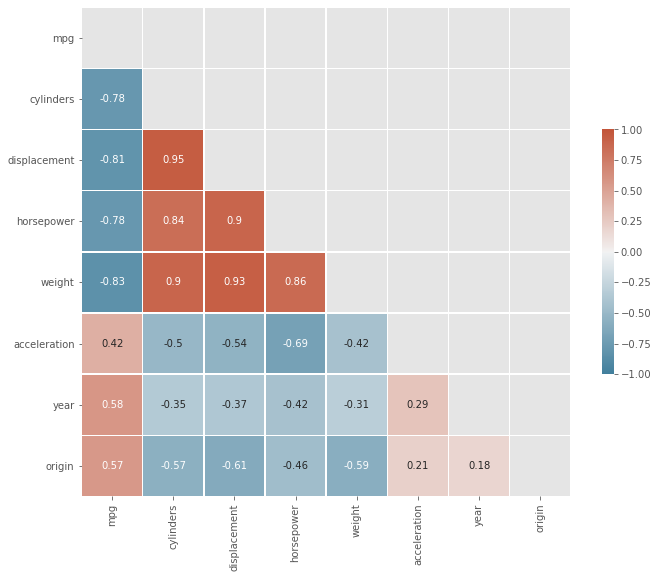

In [4]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, 
            center=0, vmin=-1, vmax=1,
           )
plt.show()

- Стоит ли использовать все признаки?

Две переменных коллинеарны, когда они находятся между собой в линейной зависимости, если коэффициент корреляции более 0,7.

Мы видим, что некоторые признаки довольно сильно коррелируют друг с другом. Их корреляции выделены красными квадратами.

Целевая переменная mpg тоже сильно связана с такими признаками, как cylinders, displacement, horsepower, weight. 

Значит у нас существует риск, что мы некорректно оценим нашу модель.

Из признаков, которые дают высокую корреляцию, я бы взяла один, например displacement. Остальные бы не брала, чтобы избежать возможной мультиколлинерности между x и y.

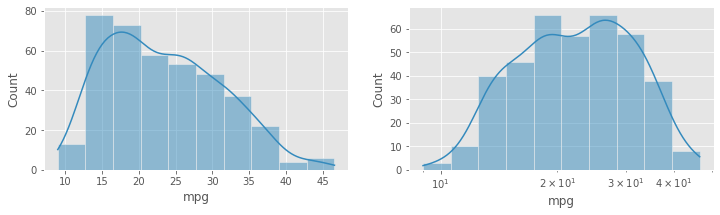

In [5]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.histplot(df['mpg'], bins=10, kde=True)
plt.subplot(122)
sns.histplot(df['mpg'], bins=10, log_scale=True, kde=True);


- Нужно ли логарифмирование?

Да, логарифмирование нужно, чтобы привести данные к нормальному виду распределения

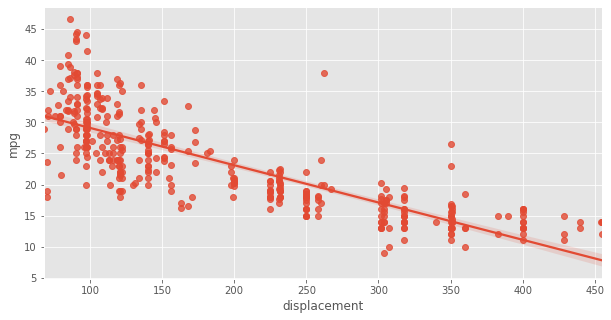

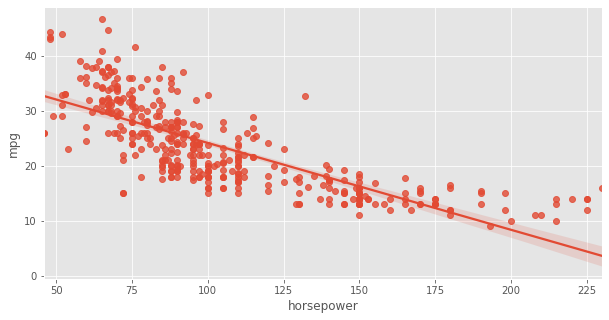

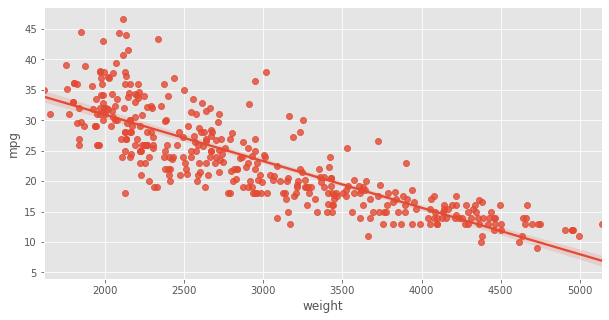

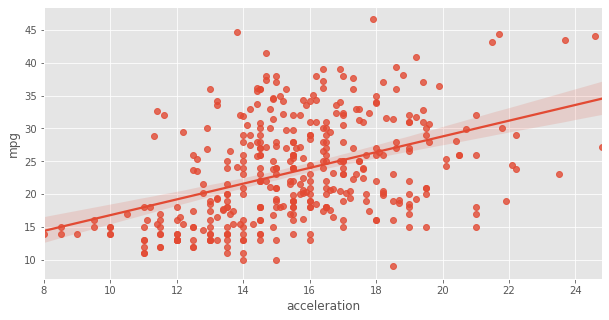

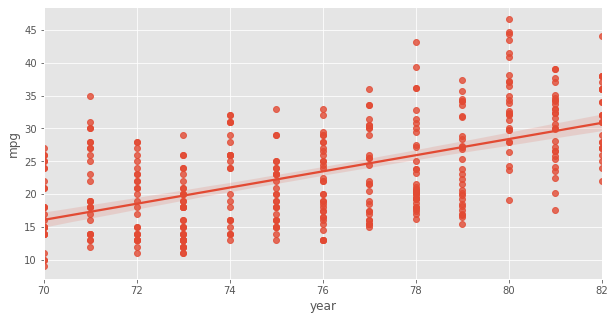

In [6]:
for x in ['displacement','horsepower','weight','acceleration','year']:
    sns.regplot(data=df, x=x, y='mpg',  
#                 logx=True
               )
    plt.show()

- Стоит ли попробовать логарифмировать некоторые признаки?

Да. Переменная displacement имеет бОльший разброс значений в начале, меньший при движении по оси Х направо. То есть наблюдаем некоторую гетероскедастичность данных. Для гомоскедастичности можно было бы попробовать прологарифмировать.

Переменная horsepower нелинейно связана с mpg, как будто бы по параболе. Для выпрямления связи также можно было бы использовать логарифмирование

У переменной weight такая же ситуация, как у displacement. При маленьких значениях weight разброс выше, чем при увеличении значения weight

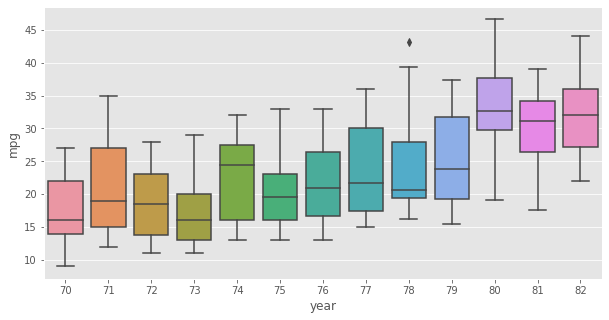

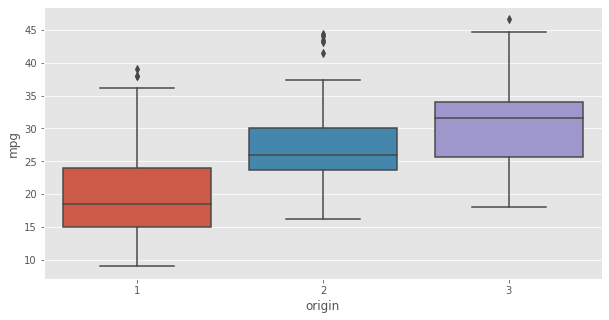

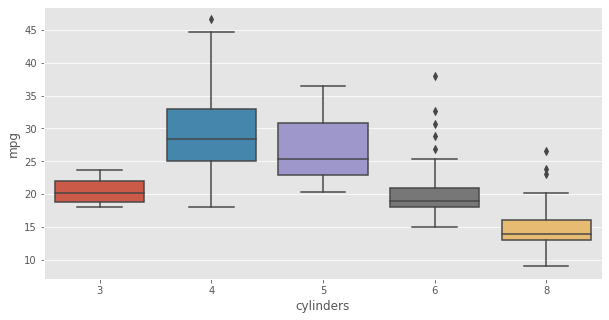

In [16]:
for x in ['year','origin','cylinders']:
    sns.boxplot(data=df, x=x, y='mpg');
    plt.show()

- Все ли признаки действительно числовые?

Нет, origin, да и cylinders похожи на категориальные переменные. 

In [17]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [18]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [19]:
df['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

## Регрессия

Проанализируем переменные, которые скоррелировали с mpg наибольшим образом, построим графики

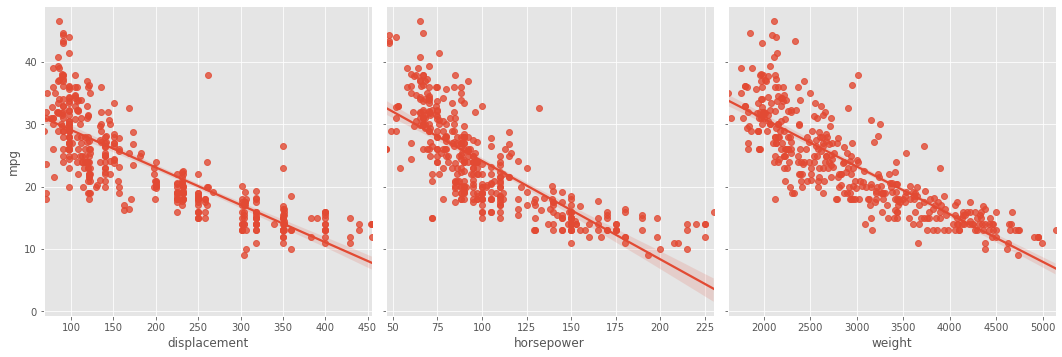

In [21]:
sns.pairplot(
    df, 
    y_vars='mpg', 
    x_vars=['displacement', 'horsepower', 'weight'], 
    height=5,
    kind='reg',
    diag_kind=None
);

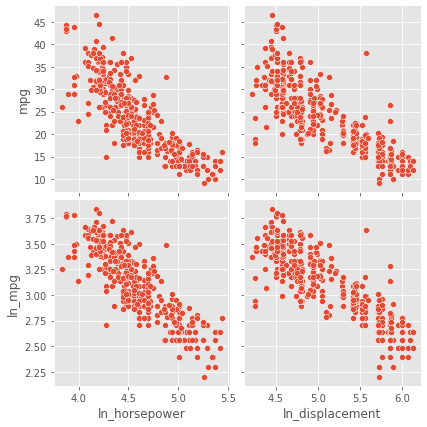

In [24]:
df['ln_horsepower'] = df['horsepower'].apply(np.log)
df['ln_displacement'] = df['displacement'].apply(np.log)
df['ln_mpg'] = df['mpg'].apply(np.log)

sns.pairplot(
    df, 
    y_vars=['mpg', 'ln_mpg'], 
    x_vars=['ln_horsepower', 'ln_displacement'], 
    height=3,
    diag_kind=None,
);


После логарифмирования удалось добиться более линейной связи, а в случае переменной displacement также снизить разброс

Сначала возьмем одну переменную, с которой у mpg сильная корреляция, например horsepower. Сравним данные без логарифмирования признака и таргета с логарифмированием признака и таргета

In [27]:
import statsmodels.formula.api as smf

model = smf.ols('mpg ~ horsepower', data=df, )
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     547.7
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           7.60e-76
Time:                        20:05:40   Log-Likelihood:                -1159.4
No. Observations:                 385   AIC:                             2323.
Df Residuals:                     383   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.1416      0.747     53.751      0.0

- p_value<0.05 -> $H_0: \beta = 0$ -> отвергается - коэффициент значим, коэффициент НЕ равен 0

In [28]:
res.params

Intercept     40.141597
horsepower    -0.160034
dtype: float64

- Получившееся уравнение 

$$
mpg_i = 40.141597 -0.160034 \cdot horsepower_i
$$

можно проинтерпретировать так, что увеличение дополнительных лошадиных сил на 100 шт уменьшает расход топлива на  1.6  миль/галлон

Теперь возьмем прологарифмированный признак и таргет

In [30]:
import statsmodels.formula.api as smf

model = smf.ols('ln_mpg ~ ln_horsepower', data=df, )
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mpg   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     909.0
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          3.66e-103
Time:                        20:07:55   Log-Likelihood:                 118.45
No. Observations:                 385   AIC:                            -232.9
Df Residuals:                     383   BIC:                            -225.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.8734      0.125     54.948

- p_value<0.05 -> $H_0: \beta = 0$ -> отвергается - коэффициент значим, коэффициент НЕ равен 0

Также увеличился $R^2$ по срав. с пред. моделью

In [32]:
res.params

Intercept        6.873396
ln_horsepower   -0.822021
dtype: float64

- Получившееся уравнение 

$$
ln mpg_i = 6.8734 -0.8220 \cdot ln horsepower_i
$$

Коэффициент 0.8220 можно проинтерпретировать как то, на сколько процентов уменьшится расход топлива при изменении лошадиных сил на  1%

## Множественная регрессия

Возьмем признак ln_horsepower и еще один признак - acceleration. Признаки displacement, weight, cylinders не берем, чтобы не получить мультиколлинеарность. Категориальные признаки и year тоже не возьмем

In [33]:
import statsmodels.formula.api as smf

model = smf.ols('ln_mpg ~ ln_horsepower + acceleration', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mpg   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     558.7
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          3.70e-114
Time:                        20:23:04   Log-Likelihood:                 147.63
No. Observations:                 385   AIC:                            -289.3
Df Residuals:                     382   BIC:                            -277.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.3303      0.218     38.250

Все коэффициенты оказываются значимыми, так как p_value<0.05. Также увеличился $R^2$ по срав. с пред. моделью

- Получившееся уравнение 

$$
ln mpg_i =  8.3303 -1.0234  \cdot ln horsepower_i - 0.0344 \cdot ln horsepower_i
$$

## Анализ остатков

Durbin-Watson в районе 2, поэтому автокоррелированности в остатках нет

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


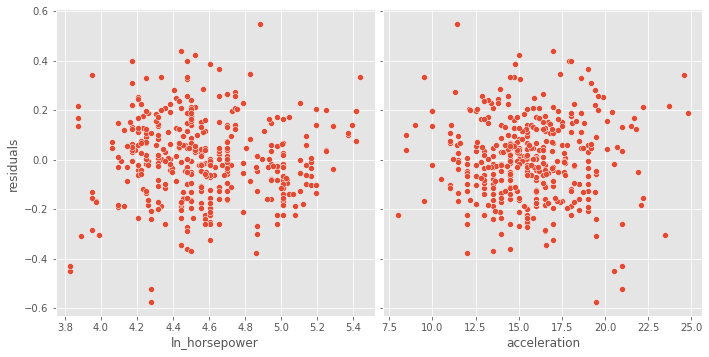

In [35]:
df['residuals'] = res.resid

sns.pairplot(
    df, 
    y_vars='residuals', 
    x_vars=['ln_horsepower', 'acceleration'], 
    height=5,
    diag_kind=None
);

Есть ли в остатках гетероскедастичность?

In [36]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(res.resid, df[['ln_horsepower', 'acceleration']].values)

(119.33852785270915,
 8.829817769832327e-28,
 86.02424694508663,
 1.3905685369717995e-31)

Видим, что `pvalue` сильно ниже уровня значимости. Гипотеза о гомоскедастичности отвергается. Можно ввести корректировку и исправить значения ошибок прямо при оценивании модели. 

In [38]:
model = smf.ols('ln_mpg ~ ln_horsepower + acceleration', data=df)
res = model.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mpg   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     589.3
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          1.78e-117
Time:                        20:31:33   Log-Likelihood:                 147.63
No. Observations:                 385   AIC:                            -289.3
Df Residuals:                     382   BIC:                            -277.4
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.3303      0.211     39.481

# Временные ряды



Есть 3 датасета с временными рядами
- В `anti-diabetic-drugs.csv` содержатся данные о ежемесячных продажах антидиабетических препаратов в Австралии с 1992 по 2008 год. 
- В `female-births.csv` содержатся данные о количестве новорожденных детей женского пола в 1959 году в Калифорнии. 
- В `shampoo.csv` содержатся данные о ежемесячных продажах шампуня за трехлетний период. 


Проанализируйте каждый из этих рядов и постройте модель SARIMA, чтобы сделать прогноз
- для `anti-diabetic-drugs.csv` - на один год вперед
- для `female-births.csv` - на один месяц вперед
- для `shampoo.csv` - на 3 месяца вперед

Для этого 
- рассмотрите необходимость стабилизации дисперссии и необходимость дифференцирования ряда
- проанализируйте ACF и PACF и подберите гиперпараметры SARIMA
- обучите модель SARIMA с наилучшими гиперпараметрами
- проанализируйте остатки модели

Ваши решения необходимо сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа. Не забывайте о построении графиков! 

Ориентируйтесь на пример анализа временного ряда в ноутбуке с последнего занятия.

## anti-diabetic-drugs

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


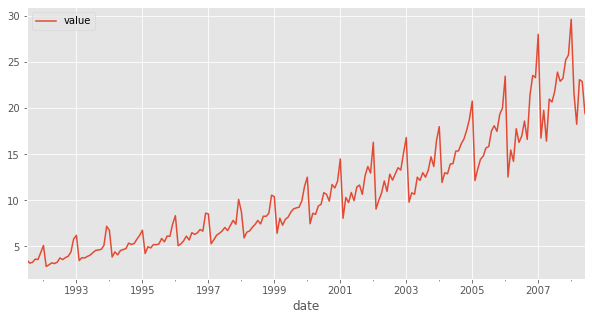

In [41]:
df = pd.read_csv('anti-diabetic-drugs.csv', index_col='date', parse_dates=['date'])
df.plot();
df.head()

Сделаем визуальный анализ:
   - в ряду присутсвует явный восходящий тренд 
   - также есть сезонность [есть равномерные пики] - скорее всего это годовая сезонность
   - дисперсия ряда в начале была низкой, под конец временного периода стала намного больше. Нам понадобится преобразование Бокса-Кокса для ее стабилизации
   - нам также понадобится дифференцирование для избавления от тренда
    

In [42]:
# импортируем данные
# здесь еще мы дополнительно сделали столбец 'month' индексом,
# преобразовали его содержимое в тип "дата" и указали, что у нас американский формат даты (сначала ) 

data = pd.read_csv("anti-diabetic-drugs.csv", 
                   index_col='date', parse_dates=['date'], dayfirst=False) 

data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [43]:
data.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [44]:
data['lag_2']= data['value'].shift(2)
data['lag_12']= data['value'].shift(12)

In [45]:
data.corr()

,value,lag_2,lag_12
value,1.000000,0.909319,0.982913
lag_2,0.909319,1.000000,0.896909
lag_12,0.982913,0.896909,1.000000


Судя по корреляции, у нас есть не только годовая сезонность, но и двухмесячная сезонность тоже, значение коэф. корреляции высокое

Построим автокорреляционную функцию для ряда

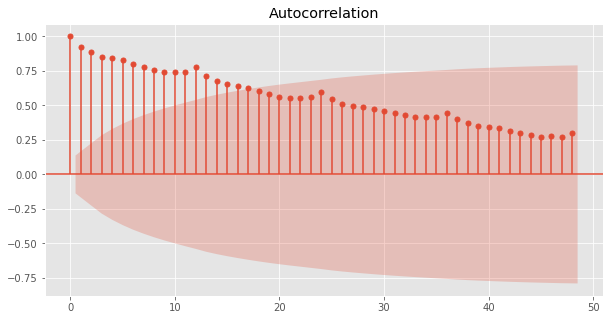

In [46]:
sm.graphics.tsa.plot_acf(df['value'], lags=48);

Наблюдаем типичный для ряда с трендом график - некая убывающая линия. Видим явные пики в графике, соответствующие годам - на 12,24,36 месяцев

Если декомпозировать временной ряд на составляющие, получим те же выводы, что и из визуального анализа ряда - есть сезонность и есть тренд:

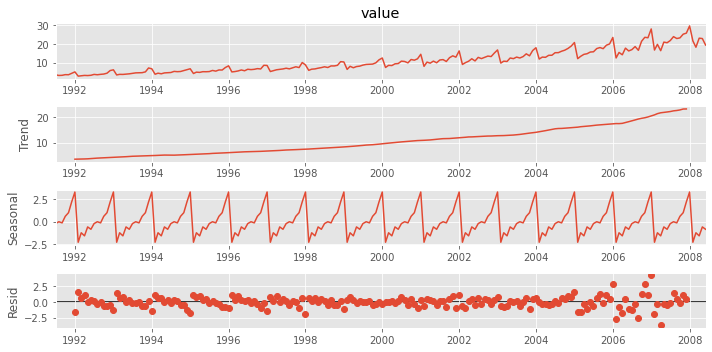

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sm.tsa.seasonal_decompose(data.value).plot()
plt.show()

Начнем преобразования ряда. Стабилизировать дисперсию мы будем с помощью преобразованися Бокса-Кокса. 

In [48]:
from scipy import stats

data['value_boxcox'], lmbd = stats.boxcox(data['value'])
print("Оптимальный параметр преобразования Бокса-Кокса: ",lmbd)

Оптимальный параметр преобразования Бокса-Кокса:  0.061505584870954325


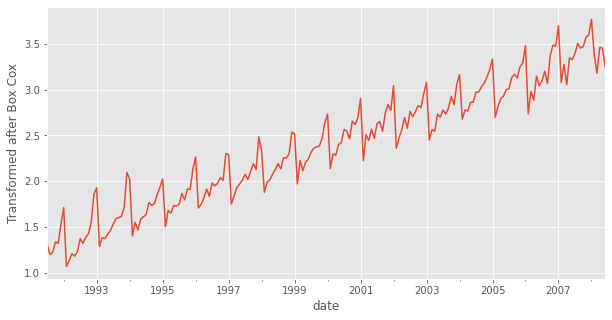

In [49]:
data.value_boxcox.plot()
plt.ylabel('Transformed after Box Cox')
plt.show()

После преобразования Бокса-Кокса дисперсия ряда стала более стабильной, в конце ряда у нас уже нет таких разбросов, как в изначальном ряду до преобразования

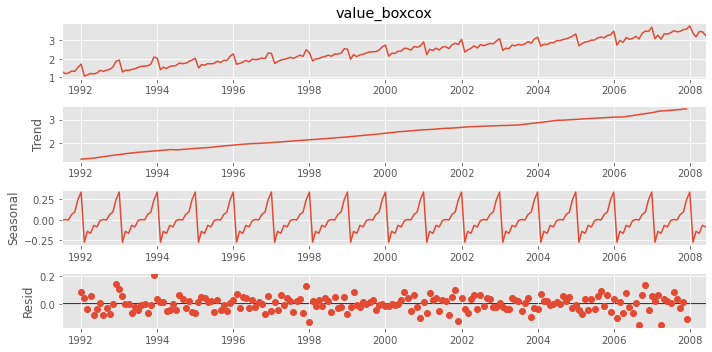

In [50]:
sm.tsa.seasonal_decompose(data.value_boxcox).plot()
plt.show()

Теперь займемся дифференциированием ряда. У нас есть годовая сезонность, начнем с нее

In [51]:
data['value_boxcox_diff'] = data.value_boxcox - data.value_boxcox.shift(12)

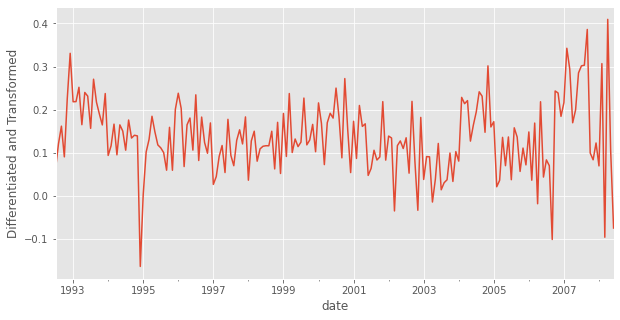

In [52]:
data.value_boxcox_diff[12:].plot()
plt.ylabel('Differentiated and Transformed')
plt.show()

Сезонность исчезла, ряд стал больше похоже на стационарный

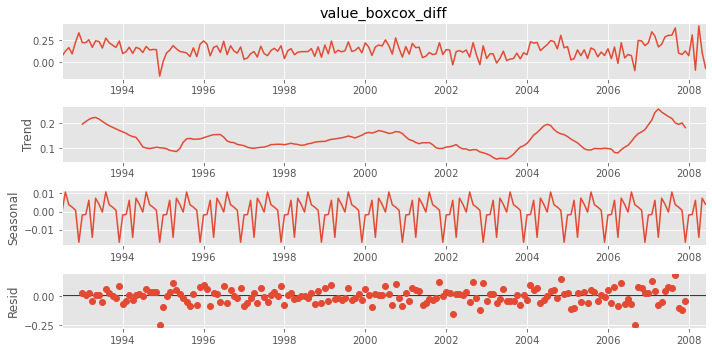

In [53]:
sm.tsa.seasonal_decompose(data.value_boxcox_diff[12:]).plot()
plt.show()

Кажется, на этом с преобразованиями можно остановиться, поскольку тренд тоже перестал быть линейным и однозначным

Проверим, что ряд теперь стационарный

In [54]:
print("Критерий Дики-Фуллера для преобразованного ряда: pvalue =",
      sm.tsa.stattools.adfuller(data.value_boxcox_diff[13:])[1])

Критерий Дики-Фуллера для преобразованного ряда: pvalue = 8.154614324157411e-06


Отвергнуть гипотезу о нестационарности временного ряда можно в том случае, если p-value < 0.05 , что у нас выполняется

Теперь займемся подбором параметров для модели SARIMA

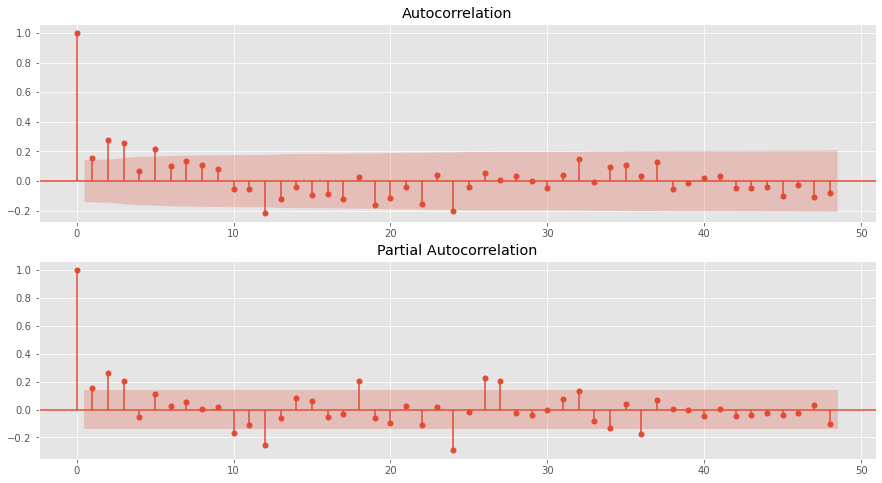

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(15,8)) 

sm.graphics.tsa.plot_acf(data.value_boxcox_diff[13:].values.squeeze(), lags=48, ax=ax1)
sm.graphics.tsa.plot_pacf(data.value_boxcox_diff[13:].values.squeeze(), lags=48, ax=ax2)

plt.show()

После изучения PACF можно сделать вывод, что $p=3$, т.к. в начале видим 3 лага, отличных от нуля. По ACF можно увидеть, что $q=3$, т.к. в начале тоже видим 3 лага, отличных от нуля.

Сезонная компонента:

Согласно этим графикам, в качестве начальных значений необходимо взять: $Q=1$,  $P=3$. Берем такие значения, так как на PACF есть три годовых значимых лага, в которым корреляция выходит за красную зону - 12,24,36 месяц. на ACF только один годовой лаг выходит за красную зону - 12ый, 24ый месяц считаем незначительным(он на границе красной зоны)

In [56]:
# создадим список из значений параметров для перебора моделей

s = 12 # сезонность
d = D = 1
ps = range(0, 3+1)
qs = range(0, 3+1)

Ps = range(0, 3+1)
Qs = range(0, 1+1)

parameters = product(ps ,qs, Ps, Qs)
parameters_list = list(parameters)

parameters_list[:10]

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 0, 3, 0),
 (0, 0, 3, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1)]

In [57]:
# посмотрим, сколько моделей нам предстоит обучить

len(parameters_list)

128

In [58]:
from tqdm.notebook import tqdm
data.head()

,value,lag_2,lag_12,value_boxcox,value_boxcox_diff
date,,,,,
1991-07-01,3.526591,NaN,NaN,1.310468,NaN
1991-08-01,3.180891,NaN,NaN,1.199335,NaN
1991-09-01,3.252221,3.526591,NaN,1.223164,NaN
1991-10-01,3.611003,3.180891,NaN,1.336047,NaN
1991-11-01,3.565869,3.252221,NaN,1.322441,NaN


In [59]:
# SARIMAX(p,d,q)x(P,D,Q,s)
results = [] # здесь будем хранить результаты
warnings.filterwarnings('ignore') # не для всех параметров модели будут обучаться; отключим предупреждения

for param in tqdm(parameters_list):
    #try-except нужен, чтобы обработать случаи, когда модель не обучается
    p, q, P, Q = param
    try:
        model=sm.tsa.statespace.SARIMAX(data.value_boxcox,  #sales_boxcox или sales
            order=(p, d, q), 
            seasonal_order=(P, D, Q, s)).fit(disp=-1)
    
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('Wrong parameters:', param)
        continue
    
    results.append([param, model.aic])

  0%|          | 0/128 [00:00<?, ?it/s]

Мы подобрали гиперпараметры, теперь посмотрим на лучшие с точки зрения критерия информативности AIC

In [60]:
result_table = pd.DataFrame(results)
result_table.columns = ['Parameters', 'AIC']

result_table.sort_values(by = 'AIC', ascending=True).head()

,Parameters,AIC
109,"(3, 1, 2, 1)",-466.142156
117,"(3, 2, 2, 1)",-465.979897
93,"(2, 3, 2, 1)",-464.906508
119,"(3, 2, 3, 1)",-463.854520
125,"(3, 3, 2, 1)",-463.254682


Лучшей моделью получилась SARIMA (3,1,1)x(2,1,1).Возьмем ее

In [61]:
best_model = sm.tsa.statespace.SARIMAX(data.value_boxcox, 
                                     order=(3,1,1), 
                                     seasonal_order=(2,1,1,12)).fit(disp=-1)

In [62]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       value_boxcox   No. Observations:                  204
Model:             SARIMAX(3, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 241.071
Date:                            Sun, 17 Apr 2022   AIC                           -466.142
Time:                                    20:39:12   BIC                           -440.124
Sample:                                07-01-1991   HQIC                          -455.604
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0220      0.064      0.342      0.732      -0.104       0.148
ar.L2          0.2654      0.064   

Посмотрим остатки это ряда

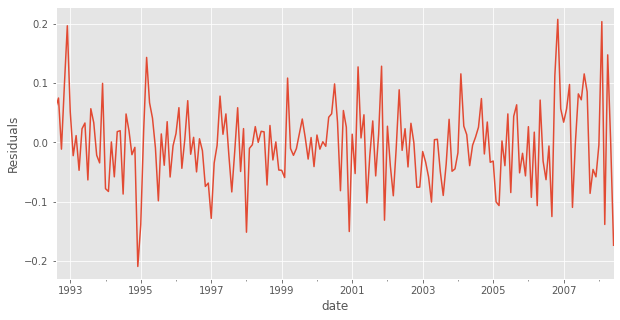

In [63]:
best_model.resid[13:].plot()
plt.ylabel('Residuals')
plt.show()

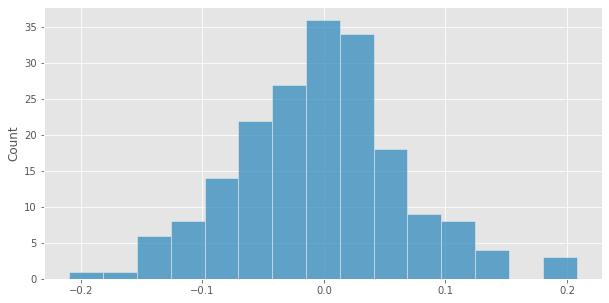

In [64]:
sns.histplot(best_model.resid[13:]);

Визуально остатки выглядят хорошо. Не видны признаки смещенности, нестационарности или какой-либо зависимости


Несмещенность. Проверим несмещенность с помощью критерия знаков 

In [65]:
from statsmodels.stats.descriptivestats import sign_test
print("Критерий знаков для остатков: pvalue =",
      sign_test(best_model.resid[13:])[1])

Критерий знаков для остатков: pvalue = 0.772341719039548


Стационарность. Проверим стационарность с помощью критерия Дики-Фуллера

In [66]:
print("Критерий Дики-Фуллера для остатков: pvalue =",
      sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

Критерий Дики-Фуллера для остатков: pvalue = 2.1841837500262504e-24


Теперь выведем нашу модель на графике и посмотрим, как хорошо она обучилась. А после сделаем предсказание

Text(0, 0.5, 'anti-diabetic-drugs')

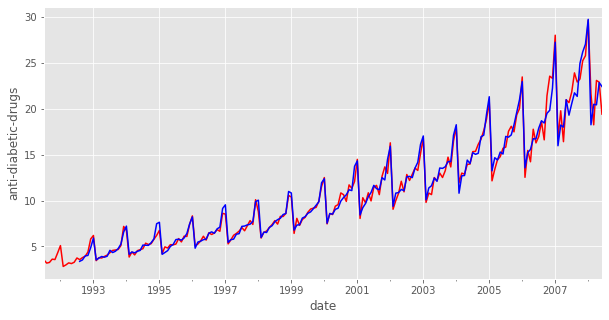

In [67]:
# сохраним значения нашей модели (не забудем сделать обратное преобразование Бокса-Кокса)

data['model'] = inv_boxcox(best_model.fittedvalues, lmbd)
data.value.plot(color='r')
data.model[13:].plot(color='b')
plt.ylabel('anti-diabetic-drugs')

Наша обученная модель неплохо предсказывает временной ряд, синия линия почти повторяет красную, в том числе в пиках

Сделаем предсказание для новых данных, для этого добавим еще временных интервалов к датафрейму, а потом предскажем ряд для этих интервалов

In [71]:
# сделаем подготовительную работу
from datetime import *; 
from dateutil.relativedelta import *

plot_data = data[['value','model']]

date_list = [datetime.strptime("2008-07-01", "%Y-%m-%d") + relativedelta(months=x) 
             for x in range(0,36)]

future = pd.DataFrame(index=date_list, columns= plot_data.columns)
plot_data = pd.concat([plot_data, future])

In [72]:
# сколько дней было при обучении модели
start = data.shape[0]
start

204

In [73]:
# построим предсказание, сделаем для него обратное преобразование Бокса-Кокса
forecast = inv_boxcox(best_model.predict(start=start, end=start+35), lmbd)
forecast.index = date_list

In [74]:
# запишем его в столбец Model
plot_data.loc[date_list, 'model'] = forecast

Text(0, 0.5, 'anti-diabetic-drugs')

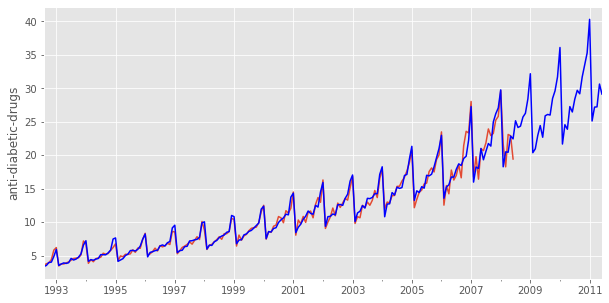

In [75]:
plot_data.value[13:].plot()
plot_data.model[13:].plot(color='b')
plt.ylabel('anti-diabetic-drugs')

Предсказание хорошо отражает тренд и сезонность, в целом похоже на правду

## female-births

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


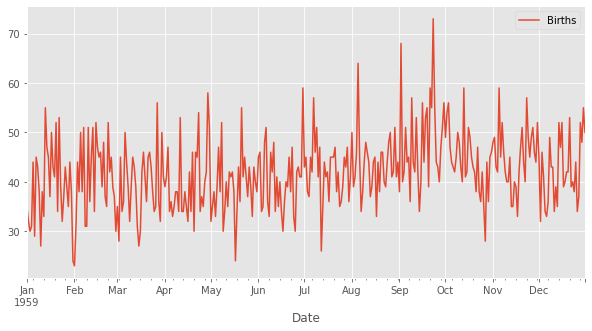

In [76]:
df = pd.read_csv('female-births.csv', index_col=['Date'], parse_dates=['Date'])
df.plot();
df.head()

Перед нами временной ряд рождения девочек по месяцам

Сделаем визуальный анализ:
   - в ряду нет явного тренда
   - также нет явной сезонности
   - дисперсия ряда кажется примерно одинаковой на протяжении всего временного промежутка
   - ряд визуально выглядит даже стационарным
    

In [77]:
# импортируем данные
# здесь еще мы дополнительно сделали столбец 'month' индексом,
# преобразовали его содержимое в тип "дата" и указали, что у нас американский формат даты (сначала ) 

data = pd.read_csv("female-births.csv", 
                   index_col=['Date'], parse_dates=['Date'], dayfirst=False) 

data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [78]:
data.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


Заметим, что данный ряд разбит по дням, а не по месяцам. У нас есть данные по дням за один год. Посмотрим смещение и корреляции на 1 день, 15 дней(пол месяца), 30 дней (месяц),60 дней (2 месяца)

In [79]:
data['lag_1']= data['Births'].shift(1)
data['lag_15']= data['Births'].shift(15)
data['lag_30']= data['Births'].shift(30)
data['lag_60']= data['Births'].shift(60)

In [80]:
data.corr()

,Births,lag_1,lag_15,lag_30,lag_60
Births,1.000000,0.217877,0.117355,0.112455,0.119078
lag_1,0.217877,1.000000,0.086552,0.144051,0.010846
lag_15,0.117355,0.086552,1.000000,0.113767,0.103988
lag_30,0.112455,0.144051,0.113767,1.000000,0.134817
lag_60,0.119078,0.010846,0.103988,0.134817,1.000000


Значимых корреляций нет, что подтверждает гипотезу об отсутствии сезонности

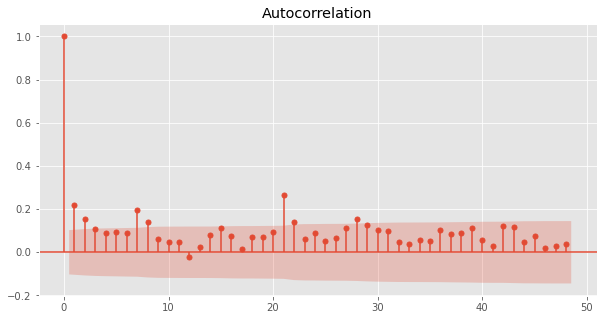

In [81]:
sm.graphics.tsa.plot_acf(data['Births'], lags=48);

По ACF также можно увидеть, что сезонности нет

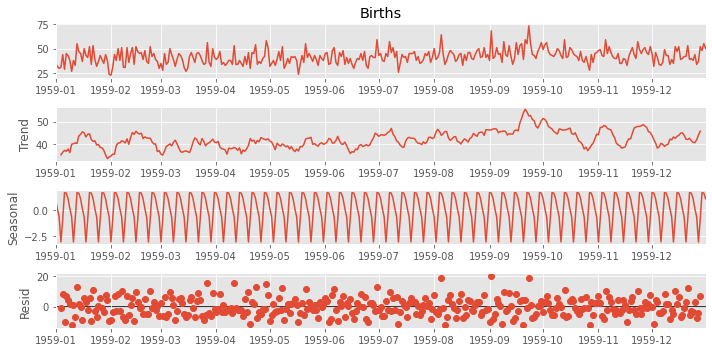

In [82]:
sm.tsa.seasonal_decompose(data.Births).plot()
plt.show()

По графику видно,что особого тренда у временного ряда нет, хотя с натяжкой можно сказать, что он восходящий

Попробуем стабилизировать дисперсию ряда, посмотрим, что получится

In [83]:
data['Births_boxcox'], lmbd = stats.boxcox(data['Births'])

In [84]:
print("Оптимальный параметр преобразования Бокса-Кокса: ",lmbd)

Оптимальный параметр преобразования Бокса-Кокса:  0.28961358249748603


Text(0, 0.5, 'Transformed BoxCox')

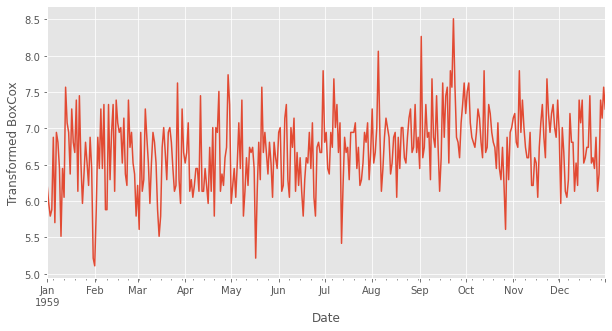

In [85]:
data.Births_boxcox.plot()
plt.ylabel('Transformed BoxCox')

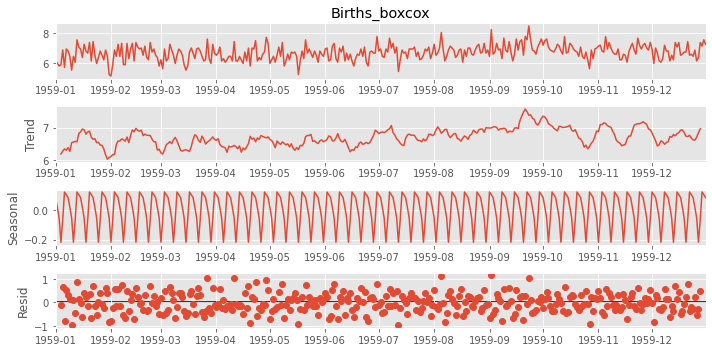

In [86]:
sm.tsa.seasonal_decompose(data.Births_boxcox).plot()
plt.show()

Дисперсия немного стабилизировалась

Поскольку явного тренда нет, попробуем не дифференцировать ряд

Предположим, что мы получили стационарный ряд. Проверим стационарность с помощью критерия Дики-Фуллера

In [87]:
print("Критерий Дики-Фуллера для преобразованного ряда: pvalue =",
      sm.tsa.stattools.adfuller(data.Births_boxcox)[1])

Критерий Дики-Фуллера для преобразованного ряда: pvalue = 0.0003719724072617037


Отвергнуть гипотезу о нестационарности временного ряда можно в том случае, если p-value < 0.05 , что у нас выполняется

Чтобы выбрать начальные значения для $p,q$ и $P,Q$, необходимо построить графики автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF).

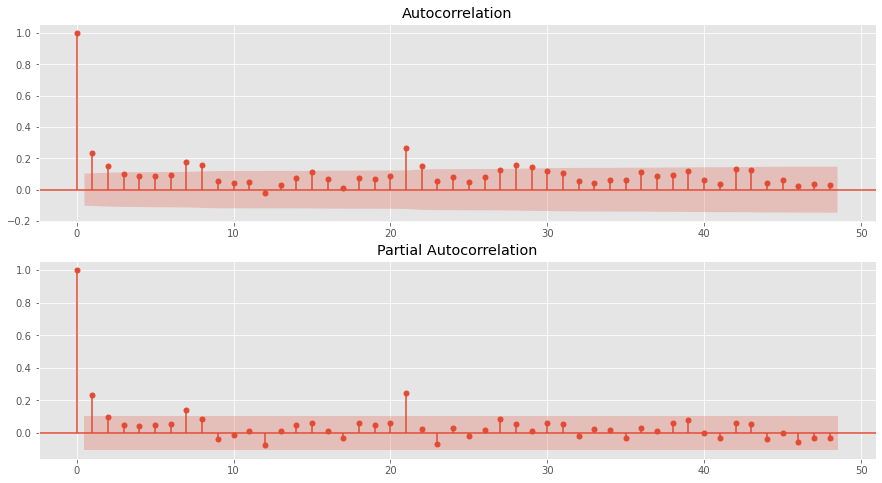

In [88]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(15,8)) 

sm.graphics.tsa.plot_acf(data.Births_boxcox.values.squeeze(), lags=48, ax=ax1)
sm.graphics.tsa.plot_pacf(data.Births_boxcox.values.squeeze(), lags=48, ax=ax2)

plt.show()

Согласно этим графикам, в качестве начальных значений необходимо взять: $q=2$, $p=1$, так как на ACF в самом начале видим 2 значимых значения, на PACF - видим 1. Сезонности никакой нет

In [94]:
# создадим список из значений параметров для перебора моделей

s = 0
d = D = 1
ps = range(0, 1+1)
qs = range(0, 2+1)

# сезонности нет, поэтому 
Ps = range(0, 0+1)
Qs = range(0, 0+1)

parameters = product(ps ,qs, Ps, Qs)
parameters_list = list(parameters)

parameters_list[:10]

[(0, 0, 0, 0),
 (0, 1, 0, 0),
 (0, 2, 0, 0),
 (1, 0, 0, 0),
 (1, 1, 0, 0),
 (1, 2, 0, 0)]

In [95]:
# посмотрим, сколько моделей нам предстоит обучить
len(parameters_list)

6

In [96]:
from tqdm.notebook import tqdm

# SARIMAX(p,d,q)x(P,D,Q,s)
results = [] # здесь будем хранить результаты
warnings.filterwarnings('ignore') # не для всех параметров модели будут обучаться; отключим предупреждения

for param in tqdm(parameters_list):
    #try-except нужен, чтобы обработать случаи, когда модель не обучается
    p, q, P, Q = param
    try:
        model=sm.tsa.statespace.SARIMAX(data.Births_boxcox,  #sales_boxcox или sales
            order=(p, d, q)).fit(disp=-1)
    
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('Wrong parameters:', param)
        continue
    
    results.append([param, model.aic])

  0%|          | 0/6 [00:00<?, ?it/s]

In [97]:
# преобразуем результаты в DataFrame и добавим названия столбцов

result_table = pd.DataFrame(results)
result_table.columns = ['Parameters', 'AIC']

# выведем 5 лучших по AIC моделей 
result_table.sort_values(by = 'AIC', ascending=True).head()

,Parameters,AIC
4,"(1, 1, 0, 0)",522.390683
2,"(0, 2, 0, 0)",522.976884
5,"(1, 2, 0, 0)",523.987210
1,"(0, 1, 0, 0)",527.168293
3,"(1, 0, 0, 0)",627.431407


Возьмем модель SARIMA (1,1,0)x(0,1,0) с 5 строки этой таблицы

In [98]:
best_model = sm.tsa.statespace.SARIMAX(data.Births_boxcox, 
                                     order=(1,1,0)).fit(disp=-1)

In [99]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:          Births_boxcox   No. Observations:                  365
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -311.716
Date:                Sun, 17 Apr 2022   AIC                            627.431
Time:                        20:50:39   BIC                            635.226
Sample:                    01-01-1959   HQIC                           630.529
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4493      0.049     -9.217      0.000      -0.545      -0.354
sigma2         0.3244      0.025     13.154      0.000       0.276       0.373
Ljung-Box (L1) (Q):                   5.97   Jarque-

Анализ остатков ряда:

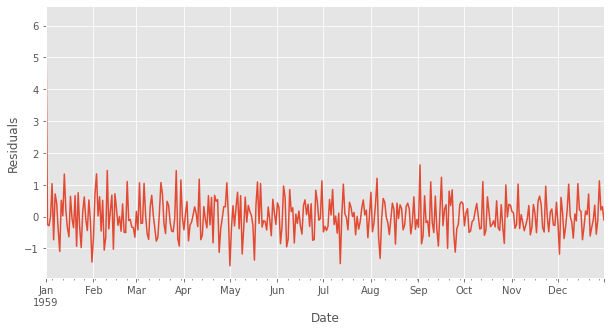

In [100]:
best_model.resid.plot()
plt.ylabel('Residuals')
plt.show()

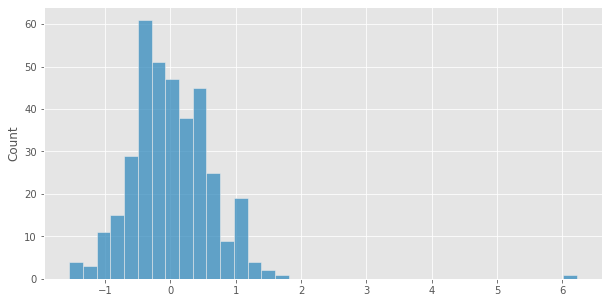

In [101]:
sns.histplot(best_model.resid);

Визуально остатки выглядят хорошо. Не видны признаки смещенности, нестационарности или какой-либо зависимости

Несмещенность. Проверим несмещенность с помощью критерия знаков 

In [102]:
from statsmodels.stats.descriptivestats import sign_test
print("Критерий знаков для остатков: pvalue =",
      sign_test(best_model.resid)[1])

Критерий знаков для остатков: pvalue = 0.7137483135372508


Стационарность. Проверим стационарность с помщью критерия Дики-Фуллера

In [103]:
print("Критерий Дики-Фуллера для остатков: pvalue =",
      sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

Критерий Дики-Фуллера для остатков: pvalue = 3.563243355756928e-25


Выведем на графике наш ряд и построенную для него модель. Для этого необходимо сделать обратное преобразование Бокса.

Text(0, 0.5, 'births')

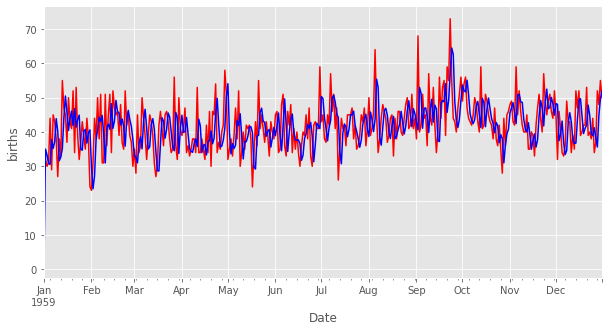

In [104]:
# сохраним значения нашей модели (не забудем сделать обратное преобразование Бокса-Кокса)

data['model'] = inv_boxcox(best_model.fittedvalues, lmbd)

data.Births.plot(color='r')
data.model.plot(color='b')
plt.ylabel('births')

Модель неплохо предсказывает ряд, синяя линяя во многих местах повторяет красную

In [105]:
data.tail()

,Births,lag_1,lag_15,lag_30,lag_60,Births_boxcox,model
Date,,,,,,,
1959-12-27,37,34.0,39.0,51.0,44.0,6.372599,38.267173
1959-12-28,52,37.0,35.0,46.0,36.0,7.390360,35.629772
1959-12-29,48,52.0,52.0,44.0,45.0,7.141889,44.811602
1959-12-30,55,48.0,47.0,52.0,46.0,7.567939,49.769112
1959-12-31,50,55.0,52.0,45.0,48.0,7.267890,51.771044


In [109]:
# сделаем подготовительную работу
from datetime import *; 
from dateutil.relativedelta import *

plot_data = data[['Births','model']]

date_list = [datetime.strptime("1960-01-01", "%Y-%m-%d") + relativedelta(days=x) 
             for x in range(0,365)]

future = pd.DataFrame(index=date_list, columns= plot_data.columns)
plot_data = pd.concat([plot_data, future])

plot_data.tail()

,Births,model
1960-12-26,NaN,NaN
1960-12-27,NaN,NaN
1960-12-28,NaN,NaN
1960-12-29,NaN,NaN
1960-12-30,NaN,NaN


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Births')

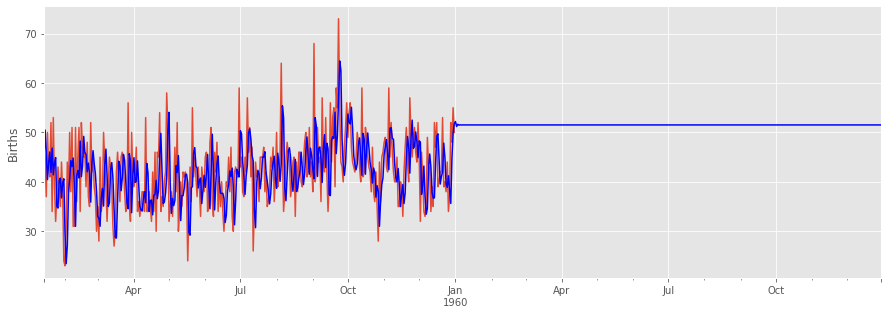

In [123]:
%pylab inline
# сколько дней было при обучении модели
start = data.shape[0]
start

# построим предсказание, сделаем для него обратное преобразование Бокса-Кокса
forecast = inv_boxcox(best_model.predict(start=start, end=start+364), lmbd)
forecast.index = date_list

# запишем его в столбец Model
plot_data.loc[date_list, 'model'] = forecast

figsize(15, 5)
plot_data.Births[13:].plot()
plot_data.model[13:].plot(color='b')
plt.ylabel('Births')

Предсказание на новые периоды очень плохое, почти равно константе. Непонятно, почему так

## shampoo

,Sales
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


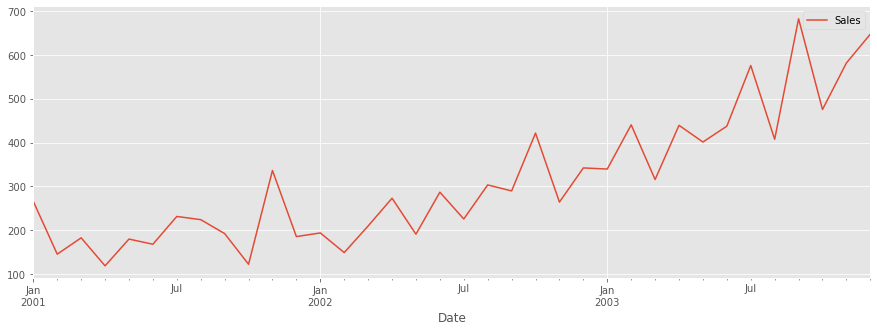

In [124]:
df = pd.read_csv('shampoo.csv')
df['Date'] = pd.to_datetime('200'+df['Month']+'-01')
df = df.set_index('Date').drop('Month',axis=1)
df.plot();
df.head()

Временной ряд продаж шампуня по месяцам 

Сделаем визуальный анализ:
   - в ряду присутсвует восходящий тренд, но в начале, в 2001, его не было
   - визуально как будто видно два похожих куска - с октября 2001 по июль 2002 и с октября 2002 по май 2003 
   - дисперсия ряда в начале была низкой, под конец временного периода стала больше. Нам понадобится преобразование Бокса-Кокса для ее стабилизации
   - нам также понадобится дифференциирование для избавления от тренда
    

Заметим, что временной ряд у нас опять по месяцам, как в первом примере. 

In [125]:
df.index# уже преобразовано в тип "дата" 

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01',
               '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01',
               '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

Посмотрим сдвиги по 2, 6, 12 месяцам и замерим корреляцию 

In [126]:
df['lag_2']= df['Sales'].shift(2)
df['lag_6']= df['Sales'].shift(6) #лаг в 6 месяцев, чтобы посмотреть, верна ли гипотеза о цикличности
df['lag_12']= df['Sales'].shift(12)

In [127]:
df.corr()

,Sales,lag_2,lag_6,lag_12
Sales,1.000000,0.850743,0.720113,0.448766
lag_2,0.850743,1.000000,0.765568,0.559125
lag_6,0.720113,0.765568,1.000000,0.593252
lag_12,0.448766,0.559125,0.593252,1.000000


Интересно, что самая большая корреляция вышла с лагом 2 месяца. Корреляция с лагом 6 месяцев тоже значимая, но меньше

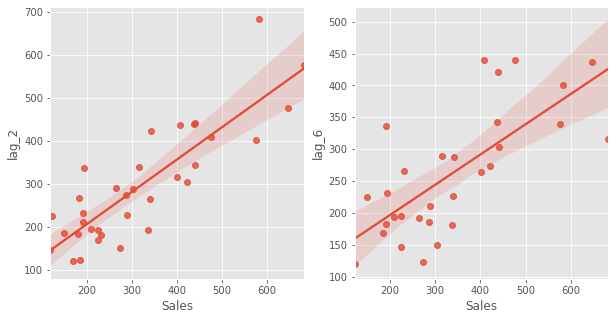

In [128]:
plt.figure(figsize=(10,5))
plt.subplot(121); sns.regplot(data=df, x='Sales', y='lag_2')
plt.subplot(122); sns.regplot(data=df, x='Sales', y='lag_6')
plt.show()

И там, и там видим восходящую прямую. Однако точки не то что бы сильно хорошо описываются ими, т.к. разброс точек велик

Построим график автокорреляционной функции

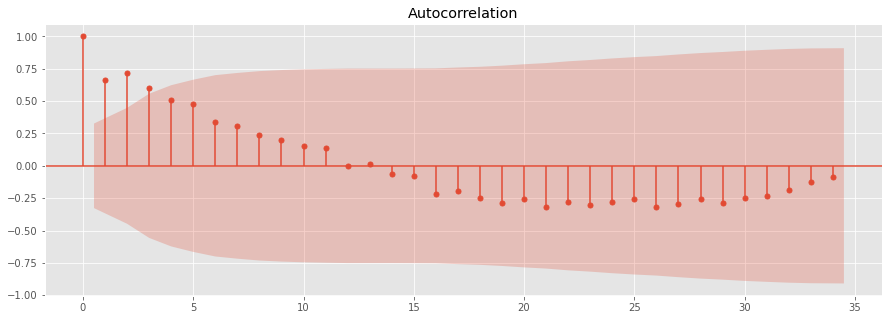

In [129]:
sm.graphics.tsa.plot_acf(df['Sales'], lags=34);

Наблюдаем типичный для ряда с трендом график - некая убывающая линия. Возможна маленькая сезонность начиная с 16 месяца, так как значения корреляции получаются как будто в виде "волны" (c 16 по 30 мес)

In [130]:
for i in range(34):
    df[f'lag_{i}'] = df['Sales'].shift(i)

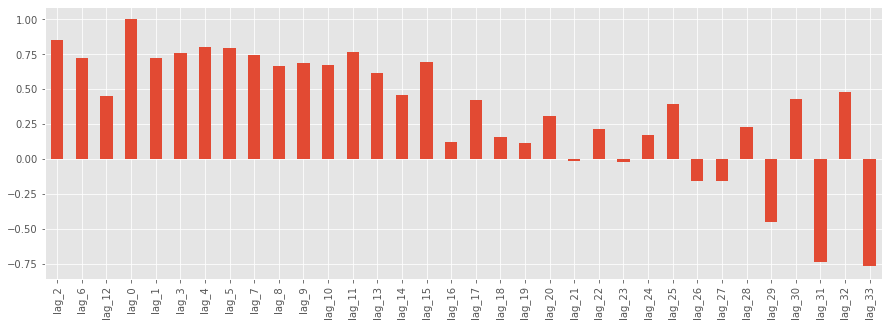

In [131]:
df.corr()['Sales'][1:].plot(kind='bar');

In [132]:
np.abs(df.corr()['Sales']).sort_values(ascending=False)[:8]#.plot()

Sales     1.000000
lag_0     1.000000
lag_2     0.850743
lag_4     0.798898
lag_5     0.797534
lag_33    0.767513
lag_11    0.763993
lag_3     0.754949
Name: Sales, dtype: float64

Как будто бы есть сезонность в 2 месяца - lag_2, lag_4 ,lag_5 (грубо говоря можно считать за 6), что в целом подтверждалось корреляционной матрицей, которая есть выше

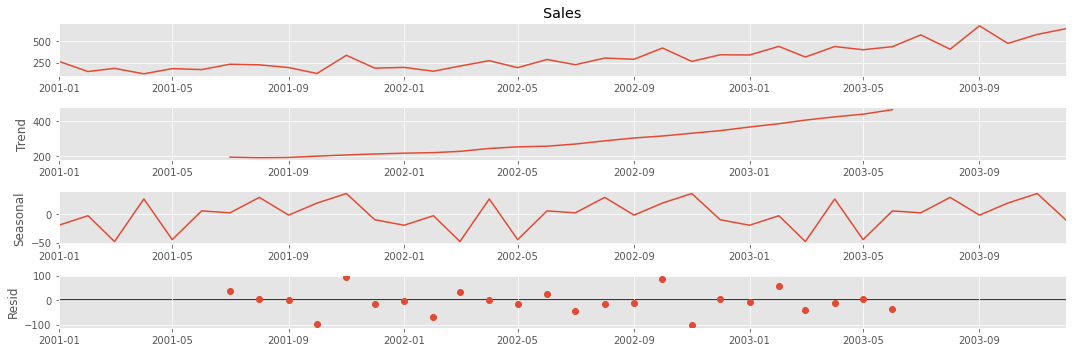

In [133]:
sm.tsa.seasonal_decompose(df.Sales).plot()
plt.show()

Есть практически линейный восходящий тренд, дисперсия тоже есть. Нужно преобразовывать ряд

Стабилизировать дисперсию мы будем с помощью преобразованися Бокса-Кокса

In [134]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df['Sales_boxcox'], lmbd = stats.boxcox(df['Sales'])

In [136]:
print("Оптимальный параметр преобразования Бокса-Кокса: ",lmbd)

Оптимальный параметр преобразования Бокса-Кокса:  -0.09471316436850583


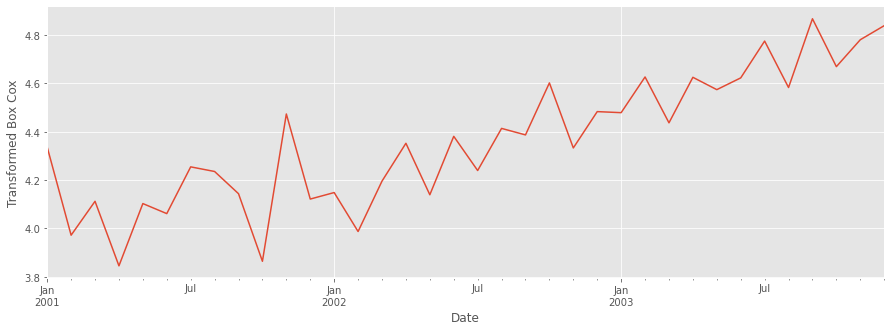

In [137]:
df.Sales_boxcox.plot()
plt.ylabel('Transformed Box Cox')
plt.show()

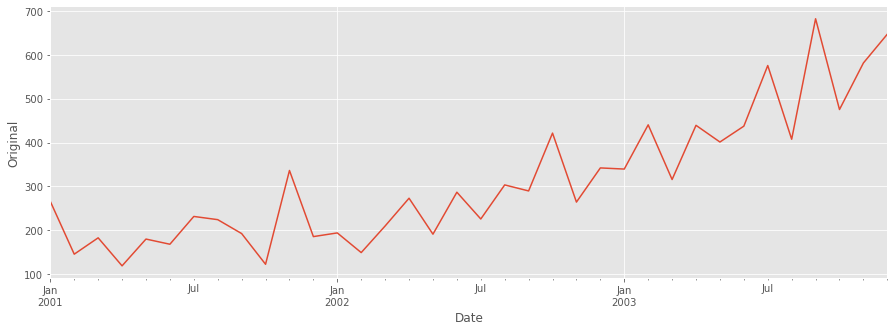

In [138]:
df.Sales.plot()
plt.ylabel('Original')
plt.show()

После преобразования Бокса-Кокса дисперсия ряда стала более стабильной. Посмотрим на STL-декомпозицию преобразованного ряда.

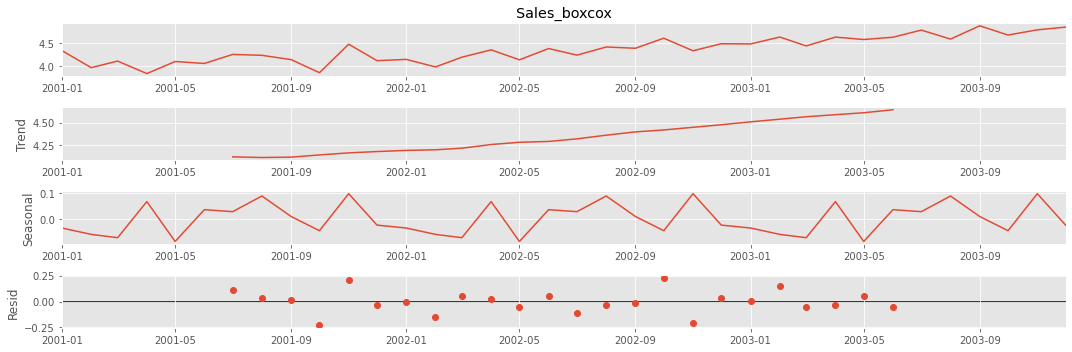

In [139]:
sm.tsa.seasonal_decompose(df.Sales_boxcox).plot()
plt.show()

Теперь воспользуемся дифференциированием, чтобы избавиться от тренда

In [140]:
df['Sales_boxcox_diff'] = df.Sales_boxcox - df.Sales_boxcox.shift(12)

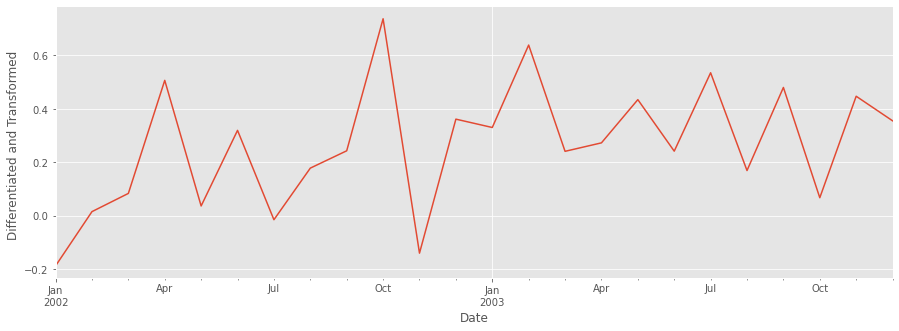

In [141]:
df.Sales_boxcox_diff[12:].plot()
plt.ylabel('Differentiated and Transformed ')
plt.show()

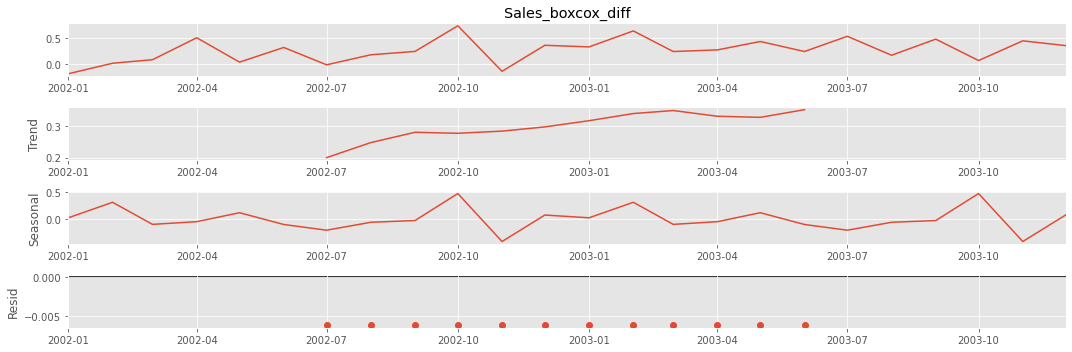

In [142]:
sm.tsa.seasonal_decompose(df.Sales_boxcox_diff[12:]).plot()
plt.show()

С трендом стало получше, но он все равно как будто остался восходящим. Сделаем еще одно дифференциирование 

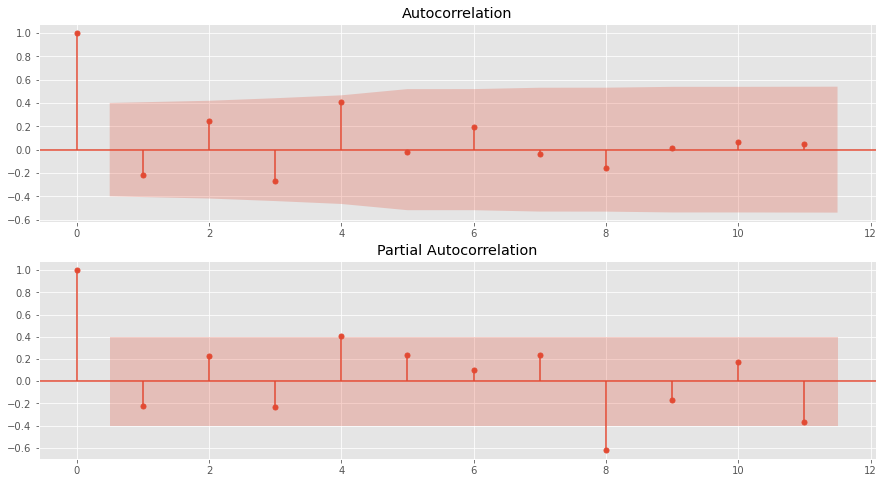

In [143]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(15,8)) 

sm.graphics.tsa.plot_acf(df.Sales_boxcox_diff[12:].values.squeeze(), lags=11, ax=ax1)
sm.graphics.tsa.plot_pacf(df.Sales_boxcox_diff[12:].values.squeeze(), lags=11, ax=ax2)

plt.show()

У нас получились странные графики. Ни в одном из них нет значимых корреляций слева, только на PACF есть 1 в точке 8. Сезонности тоже не наблюдается. Попробуем обучить модель SARIMA со стандартными параметрами

In [147]:
best_model = sm.tsa.statespace.SARIMAX(df.Sales_boxcox, 
                                     order=(1,1,1),seasonal_order=(1, 1, 1, 2)).fit(disp=-1)

Text(0, 0.5, 'shampoo')

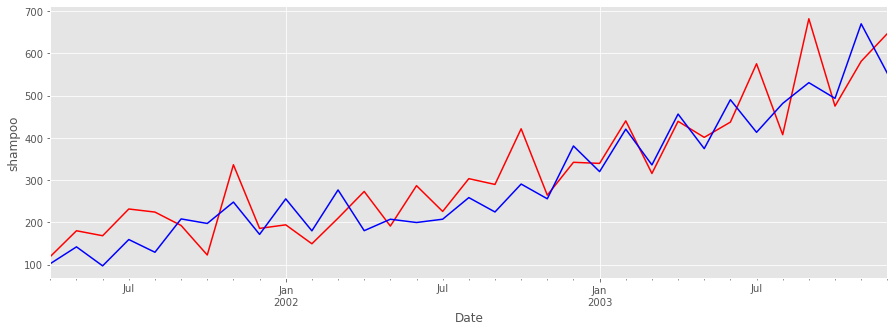

In [149]:
df['model'] = inv_boxcox(best_model.fittedvalues, lmbd)

df.Sales[3:].plot(color='r')
df.model[3:].plot(color='b')
plt.ylabel('shampoo')

Модель получилась неидеальной, но тренд и некоторые пики она повторяет.

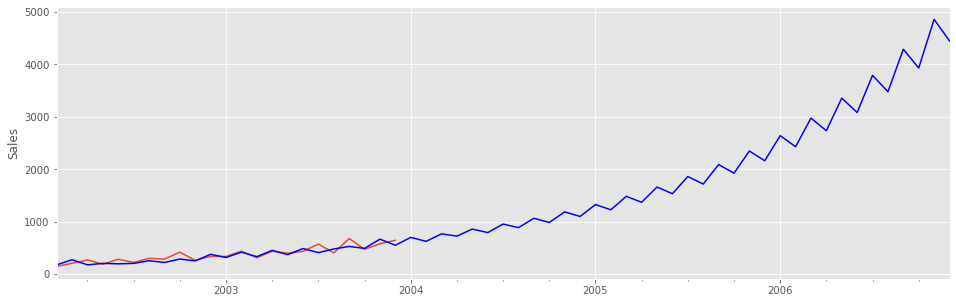

In [154]:
from datetime import *; 
from dateutil.relativedelta import *

plot_data = df[['Sales','model']]

date_list = [datetime.strptime("2004-01-01", "%Y-%m-%d") + relativedelta(months=x) 
             for x in range(0,36)]
future = pd.DataFrame(index=date_list, columns= plot_data.columns)
plot_data = pd.concat([plot_data, future])

plot_data.tail()

start = df.shape[0]
start

forecast = inv_boxcox(best_model.predict(start=start, end=start+35), lmbd)
forecast.index = date_list

plot_data.loc[date_list, 'model'] = forecast


plot_data.Sales[13:].plot()
plot_data.model[13:].plot(color='b')
plt.ylabel('Sales')
pylab.show()

В целом получился какой-то даже неплохой прогноз, восходящий тренд он по крайней мере улавливает